# Descrição do problema

Previsão de Falhas

Descrição

Os armazéns da Full no mercado livre possuem uma frota de dispositivos que transmitem telemetria agregada diária para diversos atributos.
Técnicas de manutenção preditiva são projetadas para ajudar a determinar a condição dos equipamentos de manutenção em serviço e prever quando a manutenção deve ser realizada. Essa abordagem promete economia de custos em relação à manutenção preventiva de rotina ou baseada em tempo, pois as tarefas são realizadas somente quando justificadas.

---

Entrega

O objetivo é gerar um notebook Jupyter com um modelo para **prever a probabilidade de falha do dispositivo um dia antes da falha potencial**. Uma série temporal deve ser usada para auxiliar o modelo.
O arquivo "full_devices.csv" contém os valores diários para os nove atributos do dispositivo, e a coluna que você está tentando prever é chamada de "falha", com o valor binário 0 para nenhuma falha e 1 para falha. A coluna "dispositivo" contém o ID do dispositivo.

## Cria ambiente

## Instala módulos e bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
import warnings
warnings.filterwarnings('ignore')

## Leitura dos dados

In [ ]:
devices = pd.read_csv('full_devices.csv', encoding='latin1')
devices.sample(20)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
54001,2015-03-15,S1F0G9ZF,0,74877440,0,0,0,70,240142,0,0,0
69569,2015-04-12,W1F111N7,0,241605528,0,0,0,8,218990,0,0,0
15053,2015-01-17,Z1F1VMZB,0,216882432,0,0,0,5,208176,0,0,0
32698,2015-02-11,W1F1CM93,0,212919896,0,0,0,12,41,0,0,0
14496,2015-01-17,S1F0S649,0,193355648,0,0,0,11,265856,0,0,0
117788,2015-09-05,Z1F1VMZB,0,110478344,0,0,0,5,225887,0,0,0
85315,2015-05-25,S1F0RREN,0,186343256,0,0,0,11,229101,0,0,1
32300,2015-02-11,S1F0S5VX,0,72327504,0,0,0,8,190810,0,0,1
16177,2015-01-19,W1F0TQEE,0,109223352,0,0,0,7,280941,0,0,120
102508,2015-07-13,W1F0T0B1,0,8789008,0,0,0,8,272774,0,0,0


## Análise exploratória de dados

<Figure size 1000x800 with 0 Axes>

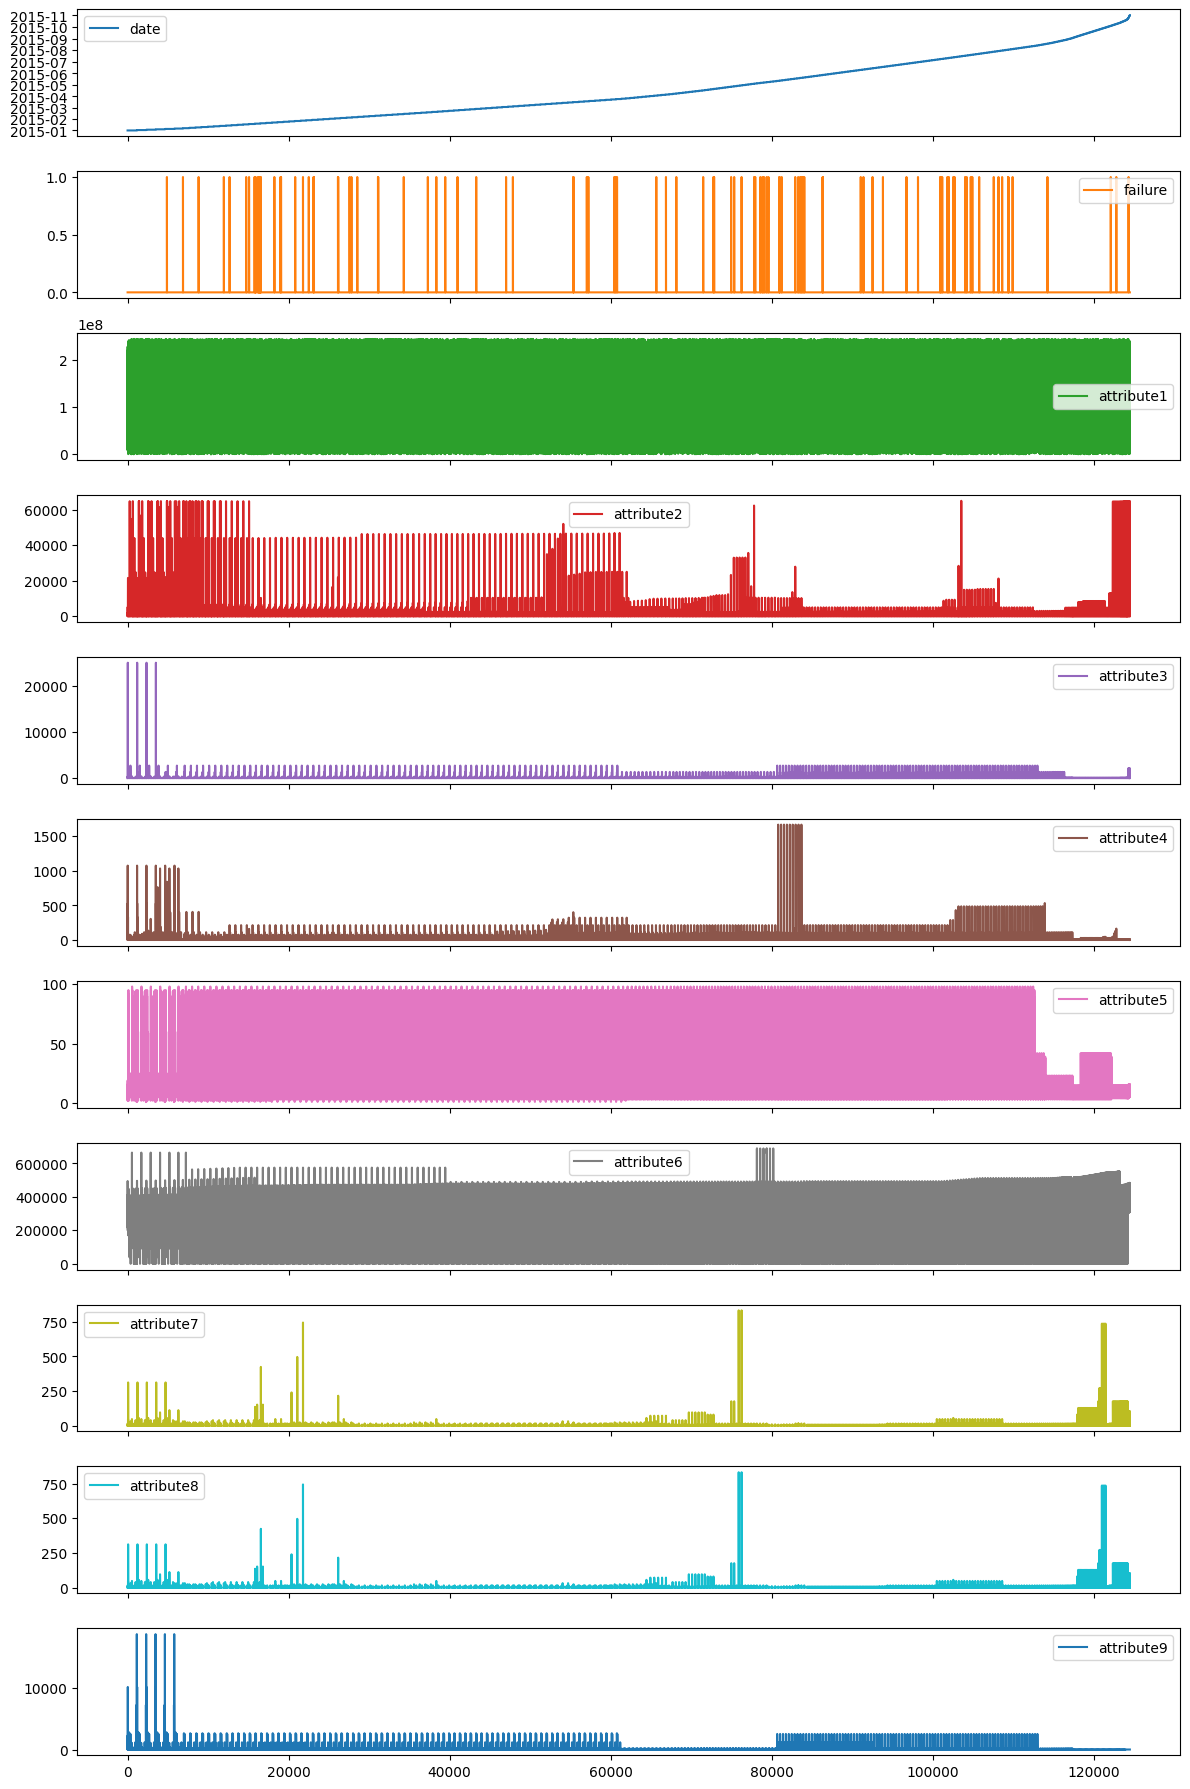

In [32]:
plt.figure(figsize=(10, 8))
axes = devices.plot(subplots=True, figsize=(12, 18), layout=(11, 1), sharex=True)
plt.tight_layout()
plt.show()

## Verificação de inconsistências

In [16]:
devices['device'].nunique()

1169

In [22]:
# Verifica se existem NAs
klib.missingval_plot(devices)


No missing values found in the dataset.


In [ ]:
devices.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


 As classes que vamos trabalhar como sendo nossa variável resposta é bastante desbalanceada, com apenas 0,08% sendo a proporção de falhas no conjunto de dados total.

In [52]:
# Volumetria da variável resposta
response_counts = devices["failure"].value_counts().reset_index()
response_counts

,failure,count
0,0,124388
1,1,106


In [53]:
print(response_counts['count'][0]/ (response_counts['count'][0]+response_counts['count'][1]))
print(response_counts['count'][1]/ (response_counts['count'][0]+response_counts['count'][1]))

0.9991485533439363
0.000851446656063746


In [54]:
exclude = ['device', 'failure']
attributes_time = devices.loc[:, ~devices.columns.isin(exclude)]
attributes_time

,date,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,226953408,0,0,0,12,358980,0,0,0


In [55]:
devices['date'] = pd.to_datetime(devices['date'])
devices['date'].describe()

,date
count,124494
mean,2015-04-16 05:20:49.737337088
min,2015-01-01 00:00:00
25%,2015-02-09 00:00:00
50%,2015-03-27 00:00:00
75%,2015-06-17 00:00:00
max,2015-11-02 00:00:00


Para cada dispositivo existe apenas uma falha no conjunto de dados

In [56]:
# Verifica se existe mais de uma falha por dispositivo
devices.groupby('device').agg({'failure': 'sum'}).sort_values(by='failure', ascending=False)

,failure
device,
W1F11ZG9,1
W1F0TA59,1
S1F0GJW3,1
S1F0GKFX,1
S1F0GKL6,1
...,...
S1F10GSG,0
S1F10GDQ,0
S1F10FZB,0


<Axes: xlabel='date'>

<Figure size 2000x600 with 0 Axes>

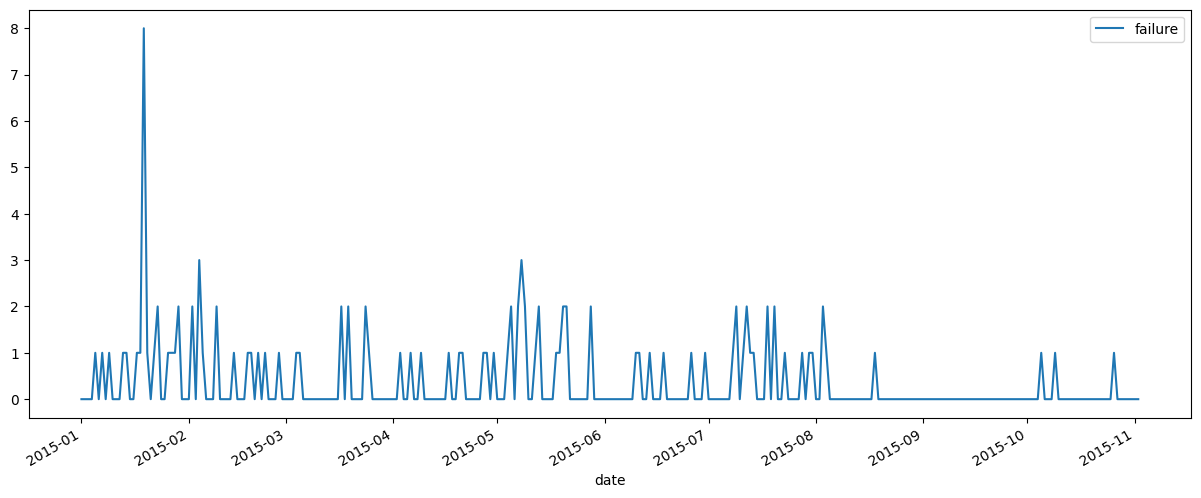

In [57]:
plt.figure(figsize=(20, 6))
devices.groupby('date').agg({'failure': 'sum'}).plot(kind = 'line', figsize=(15, 6))

Os erros não possuem dependência temporal

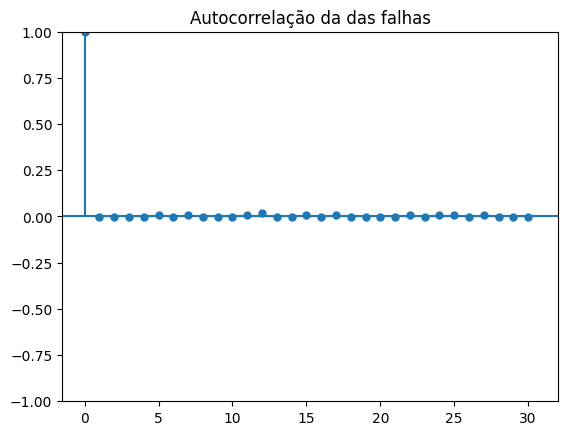

In [58]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(devices["failure"], lags=30)
plt.title("Autocorrelação da das falhas")
plt.show()

### Atributos

In [ ]:
exclude = ['device', 'date']
attributes_failure = devices.loc[:, ~devices.columns.isin(exclude)]

correlations  = attributes_failure.corr()[['failure']].sort_values(by='failure', ascending=False)
correlations = correlations.drop('failure')
correlations

,failure
attribute8,0.119055
attribute7,0.119055
attribute4,0.067398
attribute2,0.052902
attribute5,0.002270
attribute1,0.001983
attribute9,0.001622
attribute6,-0.000550
attribute3,-0.000948


Distribuições dos atributos

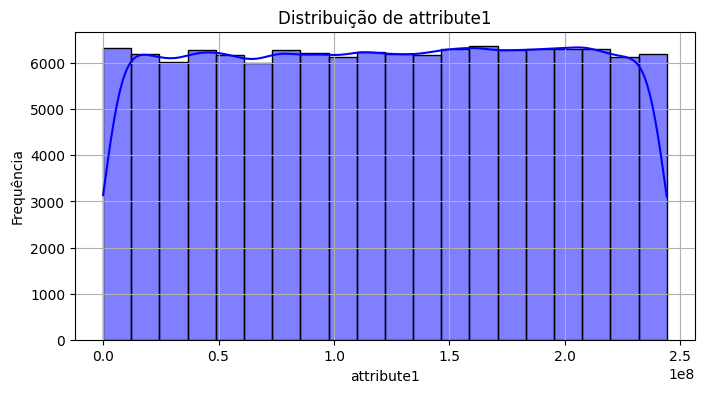

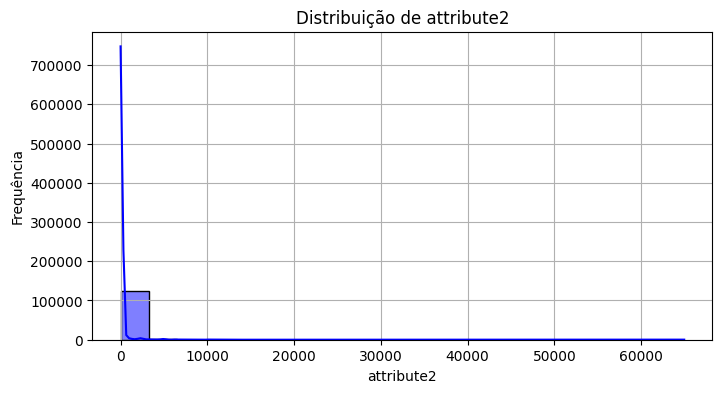

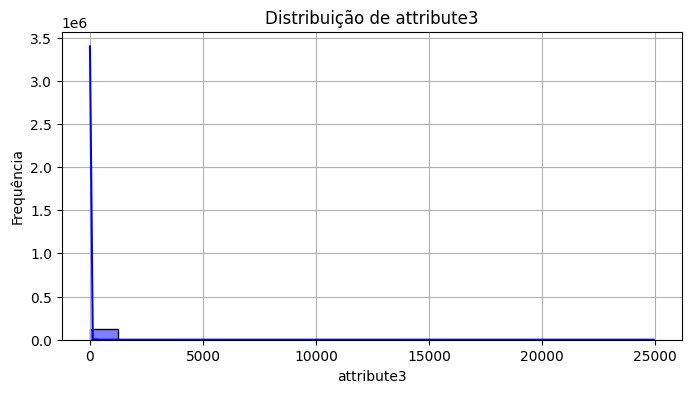

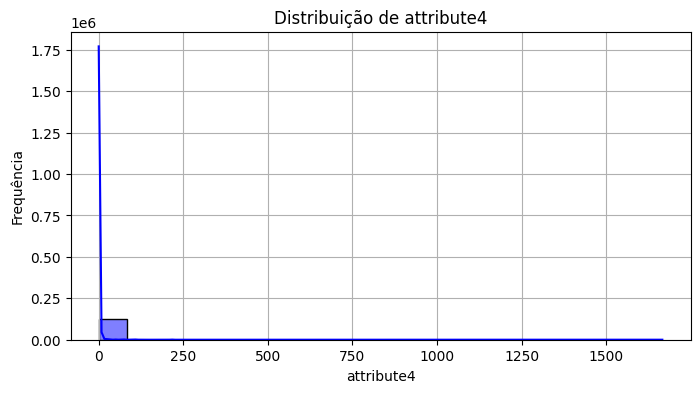

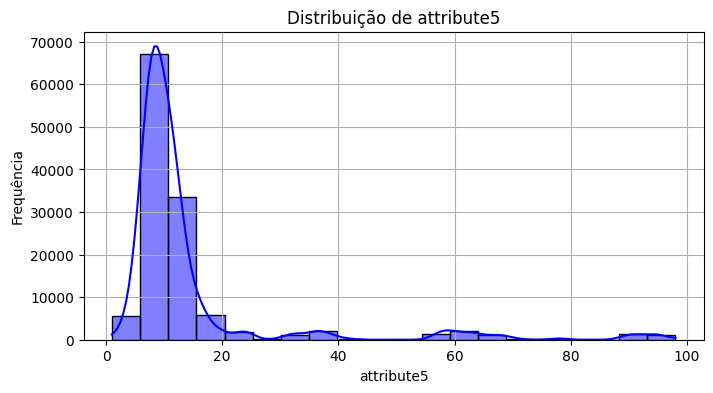

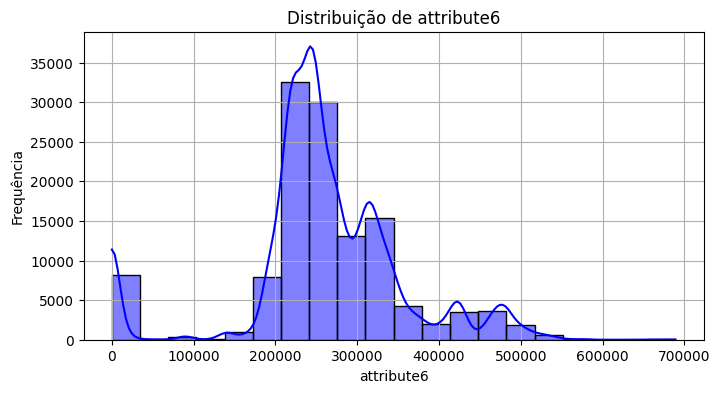

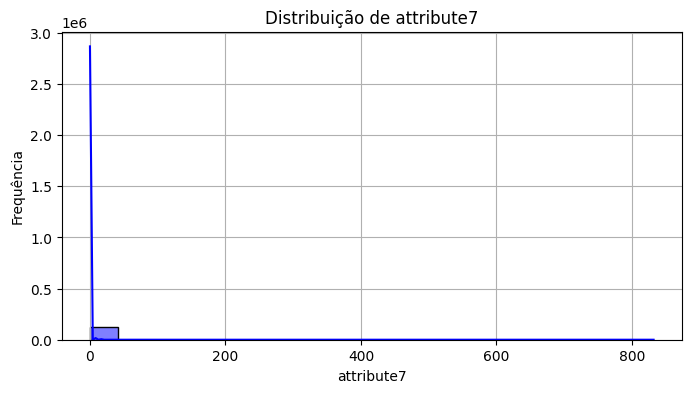

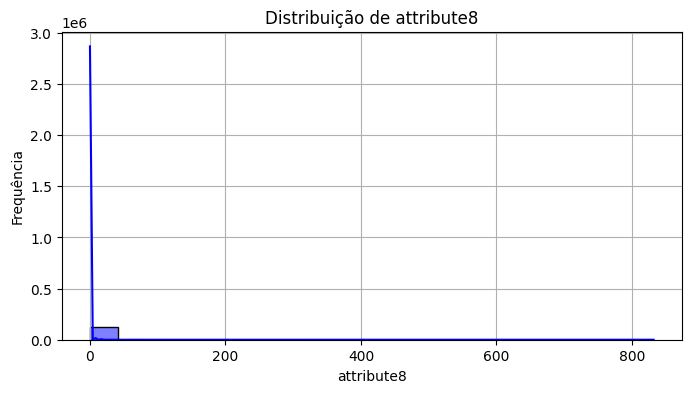

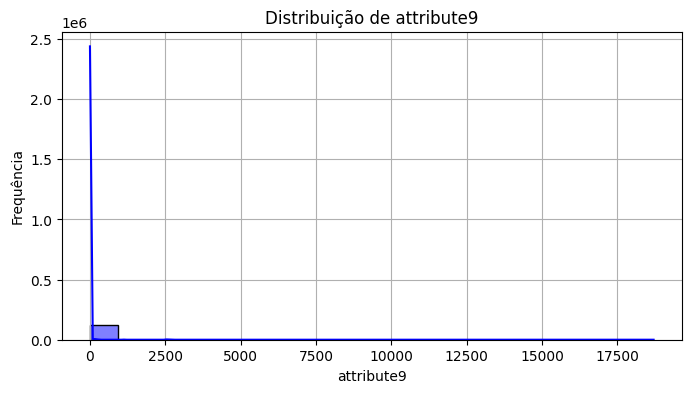

In [37]:
exclude = ['date', 'device', 'failure']
attributes = devices.loc[:, ~devices.columns.isin(exclude)]

numeric_columns = attributes.select_dtypes(include=[np.number])

for col in numeric_columns.columns:
    print("\n")
    plt.figure(figsize=(8, 4))
    sns.histplot(devices[col], kde=True, color='blue', bins=20)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()


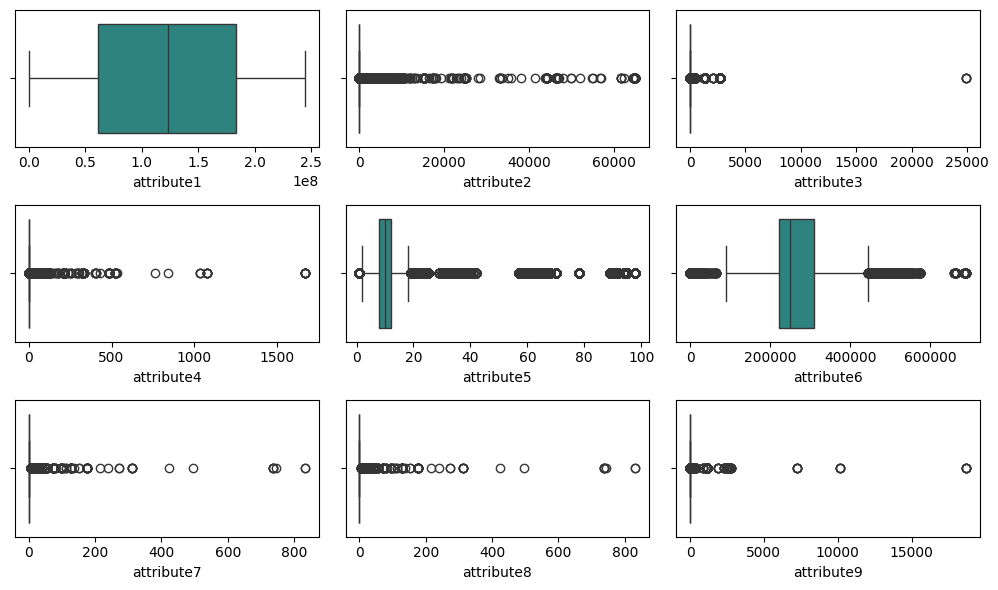

In [42]:
plt.figure(figsize=(10, 6))

attributes_cols = numeric_columns.columns.to_list()

for i in range(len(attributes_cols)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(attributes[attributes_cols[i]],
            orient="h",
            palette="viridis")

plt.tight_layout()
plt.show()

## Adequações dos dados

#### Matriz de correlação

Abaixo, notamos que a correlação entre 2 atributos(attribute7 e attribute8) é exatamente 1, o que indica que eles são idênticos e por isso colineares. Nesse caso apenas um deles se faz necessário e portanto o outro será retirado pois pode influenciar no modelo

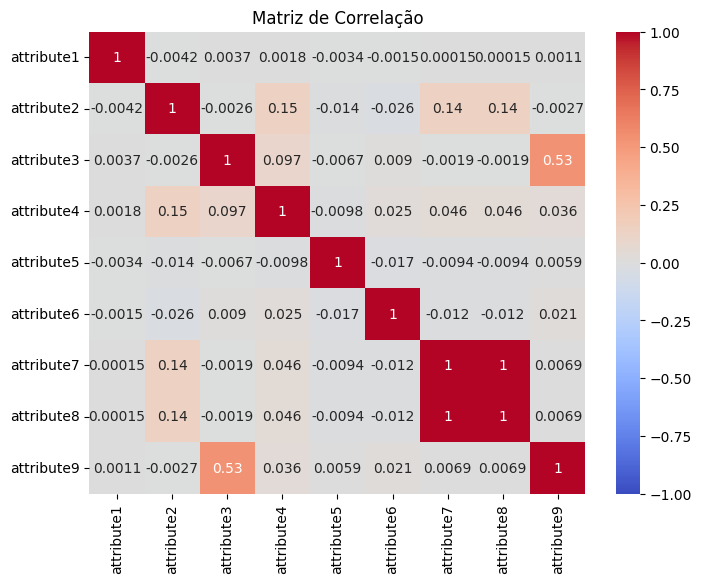

In [59]:
corr = attributes.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
del devices['attribute8']   # Retirada do attribute8

Nova matriz agora sem a coluna duplicada

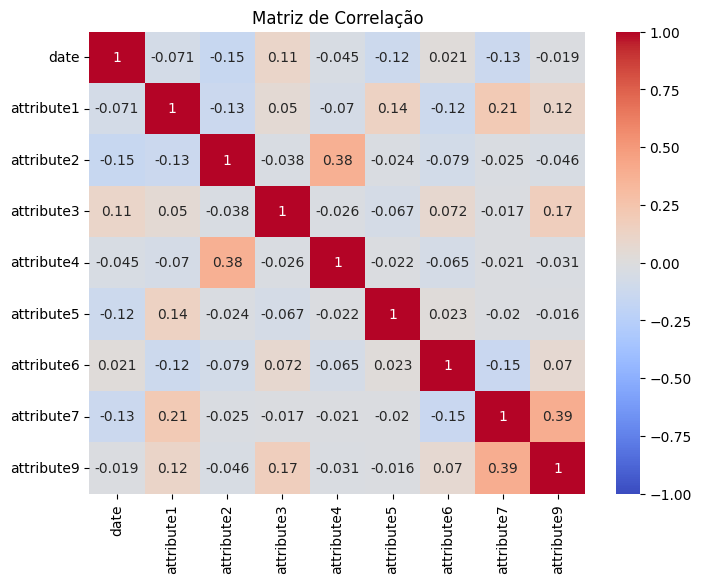

In [63]:
failure = devices[devices['failure'] == 1]
attributes_f = failure.loc[:, ~failure.columns.isin(exclude)]

corr = attributes_f.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

In [64]:
devices_last_date = devices.groupby('device').agg({'date': 'max', 'failure': 'max'}).reset_index()
devices_last_date[devices_last_date['failure'] > 0]

,device,date,failure
8,S1F023H2,2015-01-19,1
27,S1F03YZM,2015-08-03,1
48,S1F09DZQ,2015-07-18,1
67,S1F0CTDN,2015-01-07,1
78,S1F0DSTY,2015-02-14,1
...,...,...,...
1130,Z1F1901P,2015-05-12,1
1148,Z1F1AG5N,2015-05-08,1
1156,Z1F1FCH5,2015-01-19,1
1163,Z1F1RJFA,2015-05-04,1


# Modelagem

Distribuição original das classes:
failure
0    0.999149
1    0.000851
Name: proportion, dtype: float64

Train size: 99906 (Positive: 83)
Test size: 24587 (Positive: 23)

Antes do SMOTE - distribuição das classes no treino: Counter({0: 96318, 1: 83})
Após SMOTE - distribuição das classes no treino: Counter({0: 96318, 1: 96318})

Treinando RandomForest...

Treinando BalancedRandomForest...

Treinando LogisticRegression...

Treinando XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:11:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: RandomForest

AUC-ROC: 0.7640356709367679

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23518
           1       0.01      0.05      0.02        22

    accuracy                           1.00     23540
   macro avg       0.51      0.52      0.51     23540
weighted avg       1.00      1.00      1.00     23540



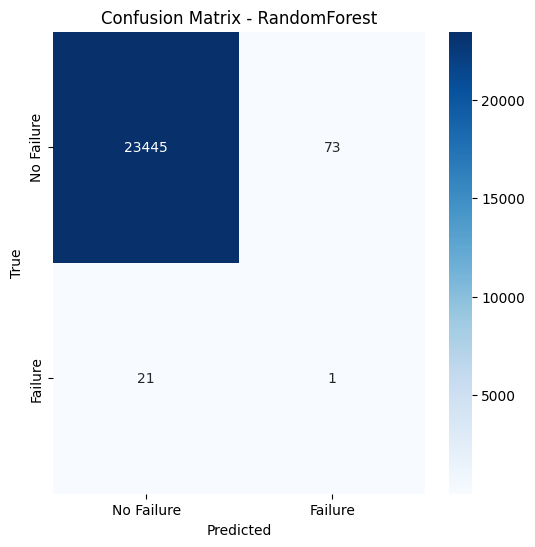


Model: BalancedRandomForest

AUC-ROC: 0.7766807242421666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23518
           1       0.01      0.05      0.02        22

    accuracy                           1.00     23540
   macro avg       0.51      0.52      0.51     23540
weighted avg       1.00      1.00      1.00     23540



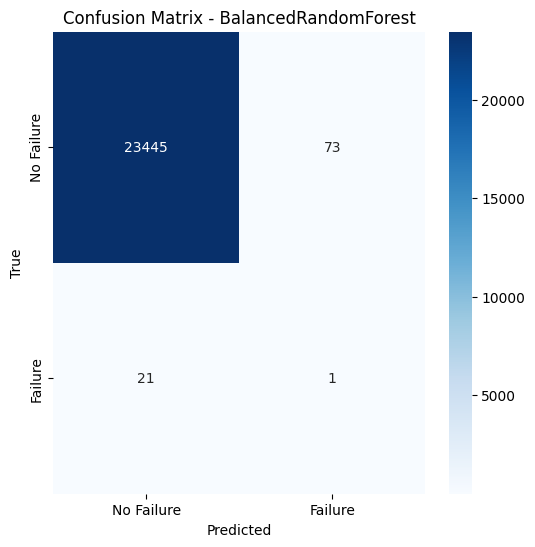


Model: LogisticRegression

AUC-ROC: 0.7306511840060611

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     23518
           1       0.01      0.45      0.02        22

    accuracy                           0.96     23540
   macro avg       0.50      0.71      0.50     23540
weighted avg       1.00      0.96      0.98     23540



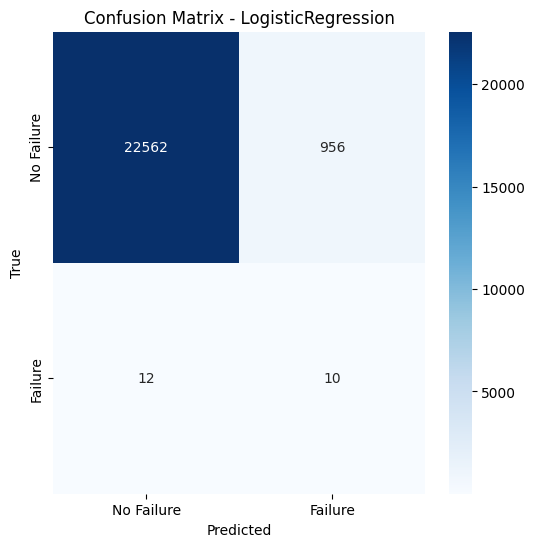


Model: XGBoost

AUC-ROC: 0.6538512087453323

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     23518
           1       0.02      0.18      0.03        22

    accuracy                           0.99     23540
   macro avg       0.51      0.59      0.51     23540
weighted avg       1.00      0.99      0.99     23540



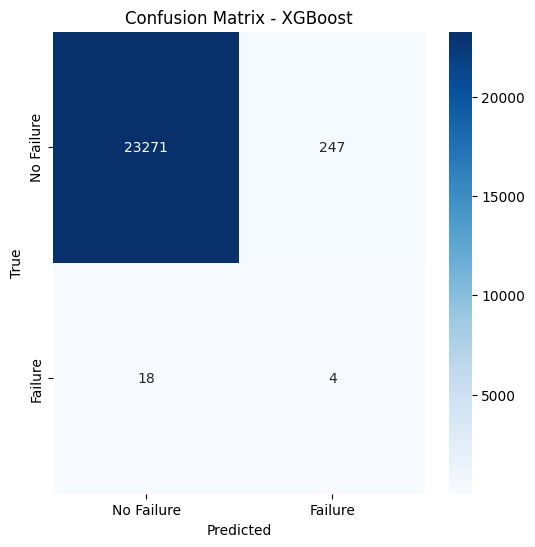


Relatório Final de Probabilidades por Dispositivo:


,device,date,prob_RandomForest,pred_RandomForest,prob_BalancedRandomForest,pred_BalancedRandomForest,prob_LogisticRegression,pred_LogisticRegression,prob_XGBoost,pred_XGBoost,true_failure,prob_avg
100944,S1F01R2B,2015-07-09,0.00,0,0.00,0,0.188844,0,5.197433e-11,0,0,0.047211
101289,S1F01R2B,2015-07-10,0.00,0,0.00,0,0.165196,0,1.571538e-07,0,0,0.041299
101632,S1F01R2B,2015-07-11,0.00,0,0.01,0,0.624354,1,4.806148e-09,0,0,0.158589
101975,S1F01R2B,2015-07-12,0.00,0,0.02,0,0.885044,1,3.362814e-11,0,0,0.226261
102317,S1F01R2B,2015-07-13,0.00,0,0.00,0,0.935624,1,2.830787e-07,0,0,0.233906
102658,S1F01R2B,2015-07-14,0.00,0,0.00,0,0.265531,0,5.130730e-04,0,0,0.066511
102998,S1F01R2B,2015-07-15,0.00,0,0.04,0,0.282626,0,5.507417e-03,0,0,0.082033
103337,S1F01R2B,2015-07-16,0.00,0,0.02,0,0.297515,0,1.957309e-02,0,0,0.084272
103676,S1F01R2B,2015-07-17,0.03,0,0.00,0,0.311186,0,9.838588e-04,0,0,0.085542
104015,S1F01R2B,2015-07-18,0.01,0,0.02,0,0.261862,0,6.519846e-07,0,0,0.072966


In [2]:
# Pipeline com resultado das probabilidades no final

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from collections import Counter

class DeviceFailureProbabilityPipeline:
    def __init__(self, file_path):
        self.file_path = file_path
        self.scaler = StandardScaler()
        self.results = {}

    def load_data(self):
        """Carrega e limpa os dados básicos"""
        self.df = pd.read_csv(self.file_path, encoding='latin1')
        #self.df['failure'] = self.df.groupby('device')['failure'].shift(-1).fillna(0) # Define novo target, caso seja de interesse
        self.df['date'] = pd.to_datetime(self.df['date'])
        self.df = self.df.sort_values(by=['device', 'date'])
        self.df = self.df.drop_duplicates()

        # Tratamento de valores inconsistentes
        for col in [f'attribute{i}' for i in range(1, 10)]:
            self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
        self.df = self.df.dropna()

        print("Distribuição original das classes:")
        print(self.df['failure'].value_counts(normalize=True))

    def temporal_split(self):
        """Divide os dados mantendo a ordem temporal"""
        cut_date = self.df['date'].quantile(0.8)

        train_cut = self.df['date'] <= cut_date
        test_cut = self.df['date'] > cut_date

        self.train_df = self.df[train_cut].copy()
        self.test_df = self.df[test_cut].copy()

        print(f"\nTrain size: {len(self.train_df)} (Positive: {self.train_df['failure'].sum()})")
        print(f"Test size: {len(self.test_df)} (Positive: {self.test_df['failure'].sum()})")

    def feature_engineering(self, df):
        """Aplica engenharia de features"""
        lag_features = [f'attribute{i}' for i in range(1, 10)]
        for lag in range(1, 4):
            for feature in lag_features:
                if feature in df.columns:
                    df[f'{feature}_lag{lag}'] = df.groupby('device')[feature].shift(lag)

        for col in [f'attribute{i}' for i in range(1, 10)]:
            if col in df.columns:
                df[f'{col}_roll_mean'] = df.groupby('device')[col].rolling(window=3).mean().reset_index(0, drop=True)
                df[f'{col}_roll_std'] = df.groupby('device')[col].rolling(window=3).std().reset_index(0, drop=True)

        return df.dropna()

    def prepare_data(self):
        """Prepara os dados de treino e teste"""
        self.train_df = self.feature_engineering(self.train_df)
        self.test_df = self.feature_engineering(self.test_df)

        # Guarda informações dos dispositivos e datas de teste antes de remover
        self.test_devices = self.test_df[['device', 'date']].copy()

        self.X_train = self.train_df.drop(columns=['failure', 'date', 'device'])
        self.y_train = self.train_df['failure']

        self.X_test = self.test_df.drop(columns=['failure', 'date', 'device'])
        self.y_test = self.test_df['failure']

        # Escala
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)

        # Aplica SMOTE apenas nos dados de treino
        print("\nAntes do SMOTE - distribuição das classes no treino:", Counter(self.y_train))
        smote = SMOTE(random_state=42)
        self.X_train_resampled, self.y_train_resampled = smote.fit_resample(self.X_train_scaled, self.y_train)
        print("Após SMOTE - distribuição das classes no treino:", Counter(self.y_train_resampled))

    def train_models(self):
        """Treina os modelos com dados balanceados"""
        self.models = {
           'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced'),
           'BalancedRandomForest': BalancedRandomForestClassifier(random_state=42),
           'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
           'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False,
                                   eval_metric='logloss', scale_pos_weight=self.calculate_scale_pos_weight())
        }

        for name, model in self.models.items():
            print(f"\nTreinando {name}...")
            model.fit(self.X_train_resampled, self.y_train_resampled)

    def calculate_scale_pos_weight(self):
        """Calcula o peso para a classe positiva no XGBoost"""
        neg = len(self.y_train[self.y_train == 0])
        pos = len(self.y_train[self.y_train == 1])
        return neg / pos if pos > 0 else 1

    def evaluate_models(self):
        """Avalia os modelos e armazena as probabilidades"""
        self.probability_results = self.test_devices.copy()

        for name, model in self.models.items():
            print(f"\n{'='*50}\nModel: {name}\n{'='*50}")

            # Predições e probabilidades
            y_pred = model.predict(self.X_test_scaled)
            y_proba = model.predict_proba(self.X_test_scaled)[:, 1]

            self.probability_results[f'prob_{name}'] = y_proba
            self.probability_results[f'pred_{name}'] = y_pred

            # Avaliação
            print("\nAUC-ROC:", roc_auc_score(self.y_test, y_proba))
            print("\nClassification Report:\n", classification_report(self.y_test, y_pred))

            cm = confusion_matrix(self.y_test, y_pred)
            plt.figure(figsize=(6, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                       xticklabels=['No Failure', 'Failure'],
                       yticklabels=['No Failure', 'Failure'])
            plt.title(f'Confusion Matrix - {name}')
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()

    def generate_final_report(self):
        """Gera um relatório final com as probabilidades por dispositivo"""
        # Adiciona a informação de falha real
        self.probability_results['true_failure'] = self.y_test.values

        # Ordena por dispositivo e data
        self.probability_results = self.probability_results.sort_values(by=['device', 'date'])

        # Calcula a probabilidade média entre os modelos(Ensemble)
        prob_columns = [f'prob_{name}' for name in self.models.keys()]
        self.probability_results['prob_avg'] = self.probability_results[prob_columns].mean(axis=1)

        return self.probability_results

    def run_pipeline(self):
        """Executa todo o pipeline e retorna o relatório final"""
        self.load_data()
        self.temporal_split()
        self.prepare_data()
        self.train_models()
        self.evaluate_models()
        final_report = self.generate_final_report()

        return final_report

# Execução do pipeline
pipeline = DeviceFailureProbabilityPipeline("/content/drive/MyDrive/PSEL e Hackatons/Mercado Livre/full_devices.csv")
probability_report = pipeline.run_pipeline()

print("\nRelatório Final de Probabilidades por Dispositivo:")
probability_report.head(20)

In [3]:
# Dispositivos com maior risco médio de falha
risk_devices = probability_report.groupby('device')['prob_avg'].max().sort_values(ascending=False)
print("\nDispositivos com maior probabilidade de falha:")
print(risk_devices.head(10))


Dispositivos com maior probabilidade de falha:
device
S1F0TNW4    0.906998
W1F0T0B1    0.889264
S1F0EGMT    0.852460
W1F0Z3G1    0.821536
S1F0JGJV    0.804997
Z1F147WQ    0.800867
W1F1B0KF    0.751161
S1F135TN    0.717451
S1F0E9EP    0.716638
S1F0GCED    0.711764
Name: prob_avg, dtype: float64


<Axes: xlabel='prob_avg', ylabel='Count'>

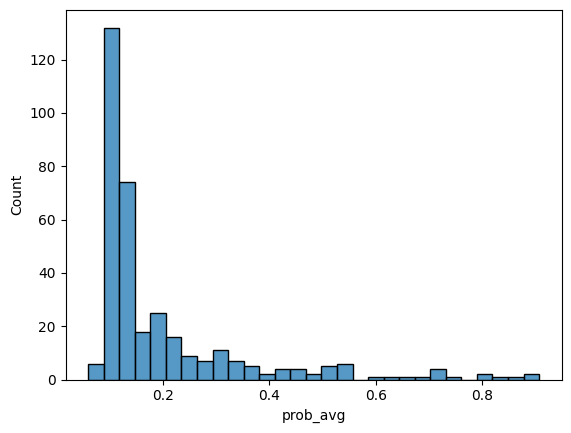

In [4]:
sns.histplot(risk_devices)

In [5]:
high_risk_devices = risk_devices.head(10).reset_index()
top_high_risk_devices = high_risk_devices['device'].unique().tolist()
top_high_risk_devices

['S1F0TNW4',
 'W1F0T0B1',
 'S1F0EGMT',
 'W1F0Z3G1',
 'S1F0JGJV',
 'Z1F147WQ',
 'W1F1B0KF',
 'S1F135TN',
 'S1F0E9EP',
 'S1F0GCED']

In [6]:
# Exemplo: Evolução temporal para um dispositivo específico
device_id = "S1F0GSHB"
device_history = probability_report[probability_report['device'] == device_id]
print(f"\nHistórico de probabilidades para o dispositivo {device_id}:")
print(device_history[['date', 'prob_avg', 'true_failure']])


Histórico de probabilidades para o dispositivo S1F0GSHB:
             date  prob_avg  true_failure
100972 2015-07-09  0.299837             0
101317 2015-07-10  0.179144             0
101660 2015-07-11  0.105277             0
102003 2015-07-12  0.173824             0
102345 2015-07-13  0.161459             0
102686 2015-07-14  0.148518             0
103026 2015-07-15  0.189368             0
103365 2015-07-16  0.154867             0
103704 2015-07-17  0.148438             0
104043 2015-07-18  0.607666             0
104381 2015-07-19  0.408786             0
104719 2015-07-20  0.494636             0
105057 2015-07-21  0.419117             0
105393 2015-07-22  0.439417             0
105729 2015-07-23  0.508706             0
106065 2015-07-24  0.703421             0
106399 2015-07-25  0.464267             0
106733 2015-07-26  0.549242             0
107067 2015-07-27  0.397863             0
107401 2015-07-28  0.541098             0
107735 2015-07-29  0.537715             0
108068 2015-07-30 

In [7]:
def plot_probabilidades_com_falha(df, list_devices):

    for device in list_devices:
        device_data = df[df['device'] == device]

        if device_data.empty:
            print(f"Dispositivo {device} não encontrado na base.")
            continue

        plt.figure(figsize=(20, 6))
        plt.plot(device_data['date'], device_data['prob_avg'], label='Média de Probabilidade')

        # Adiciona linhas verticais nas datas de falha, caso houve
        failure_dates = device_data[device_data['true_failure'] == 1]['date']
        for data in failure_dates:
            plt.axvline(data, color='red', linestyle='--', alpha=0.7)

        plt.title(f'Probabilidade de Falha - Dispositivo {device}')
        plt.xlabel('Data')
        plt.ylabel('Probabilidade')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

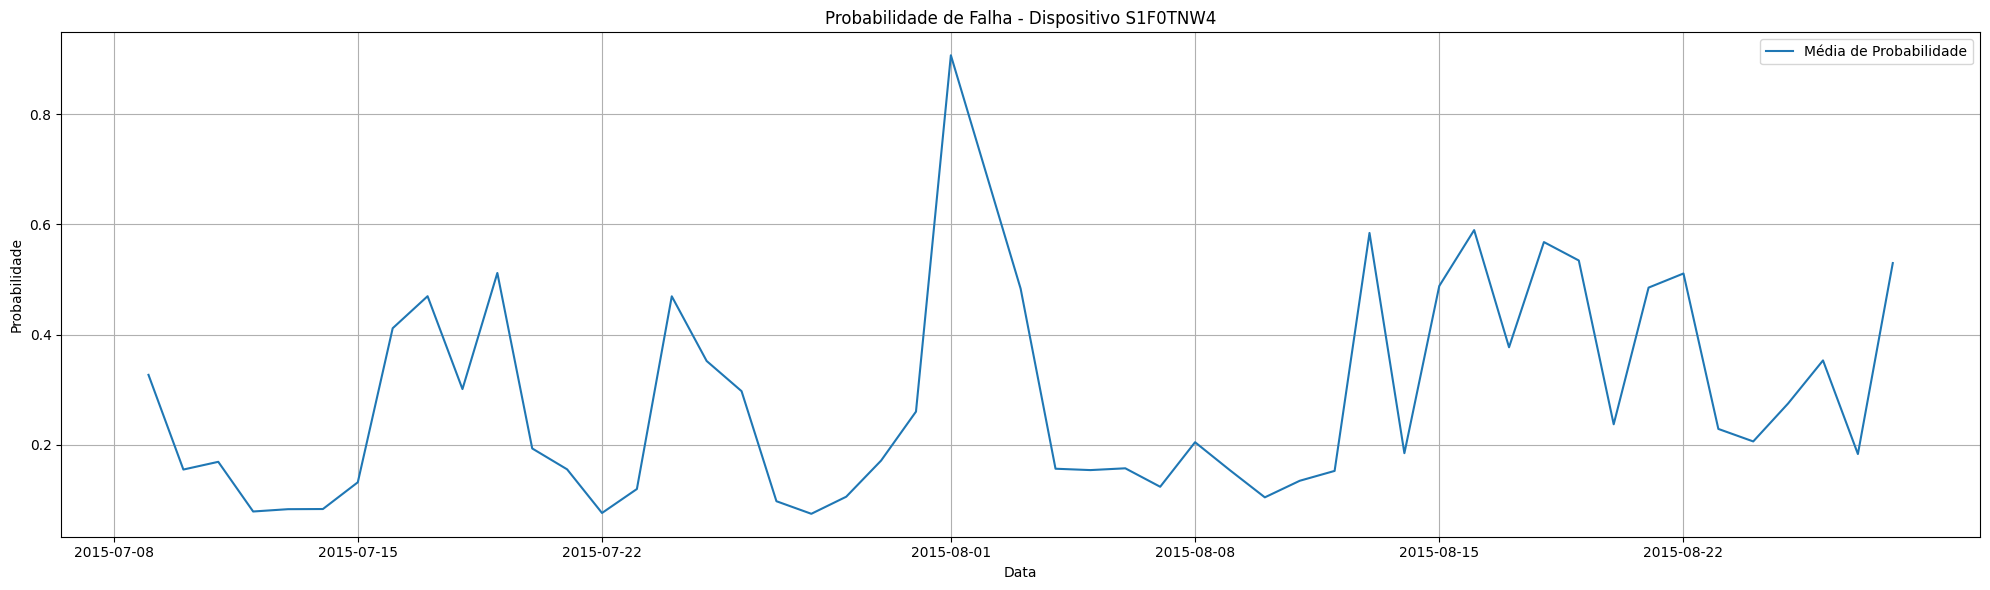

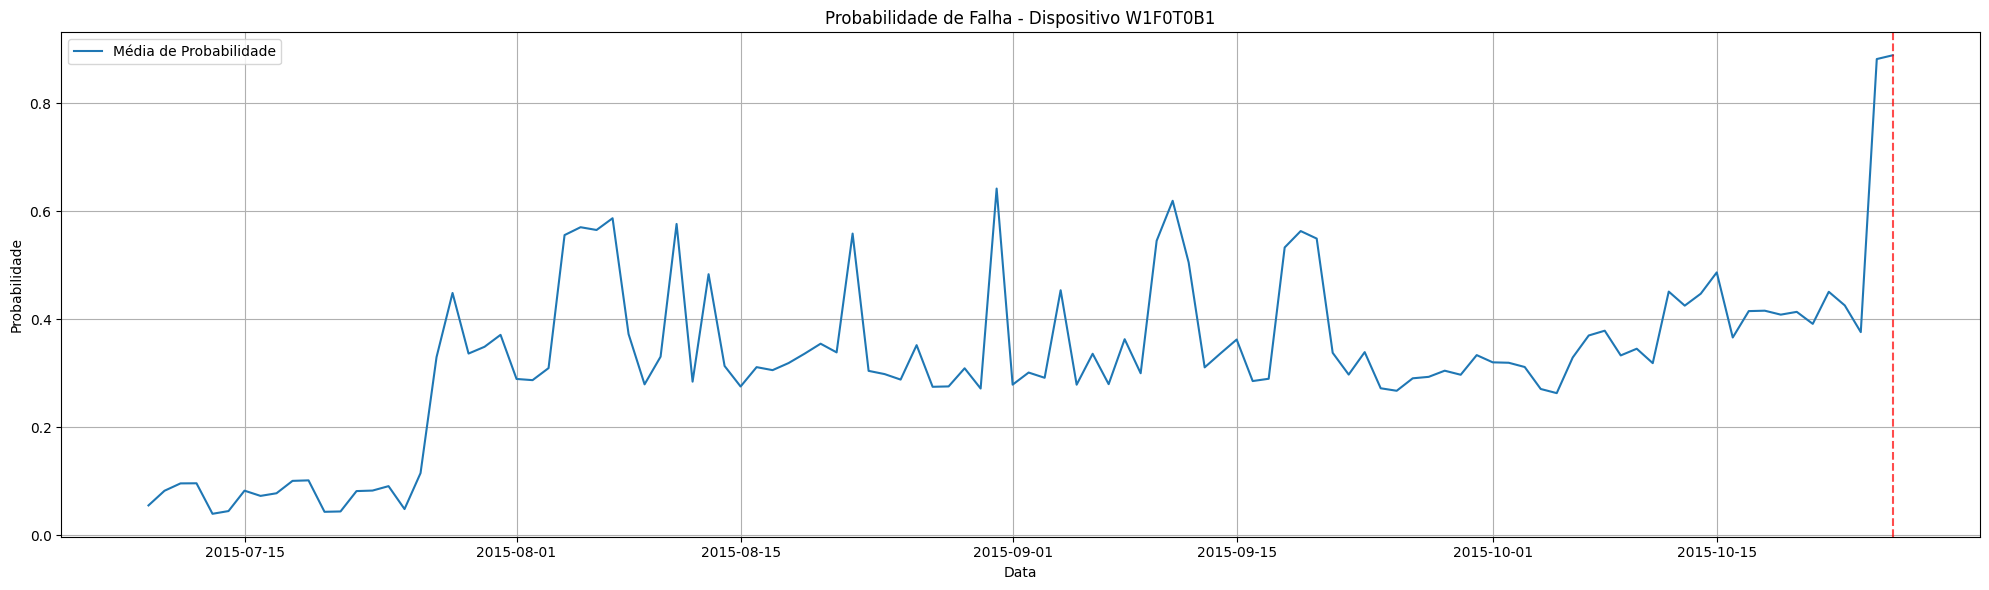

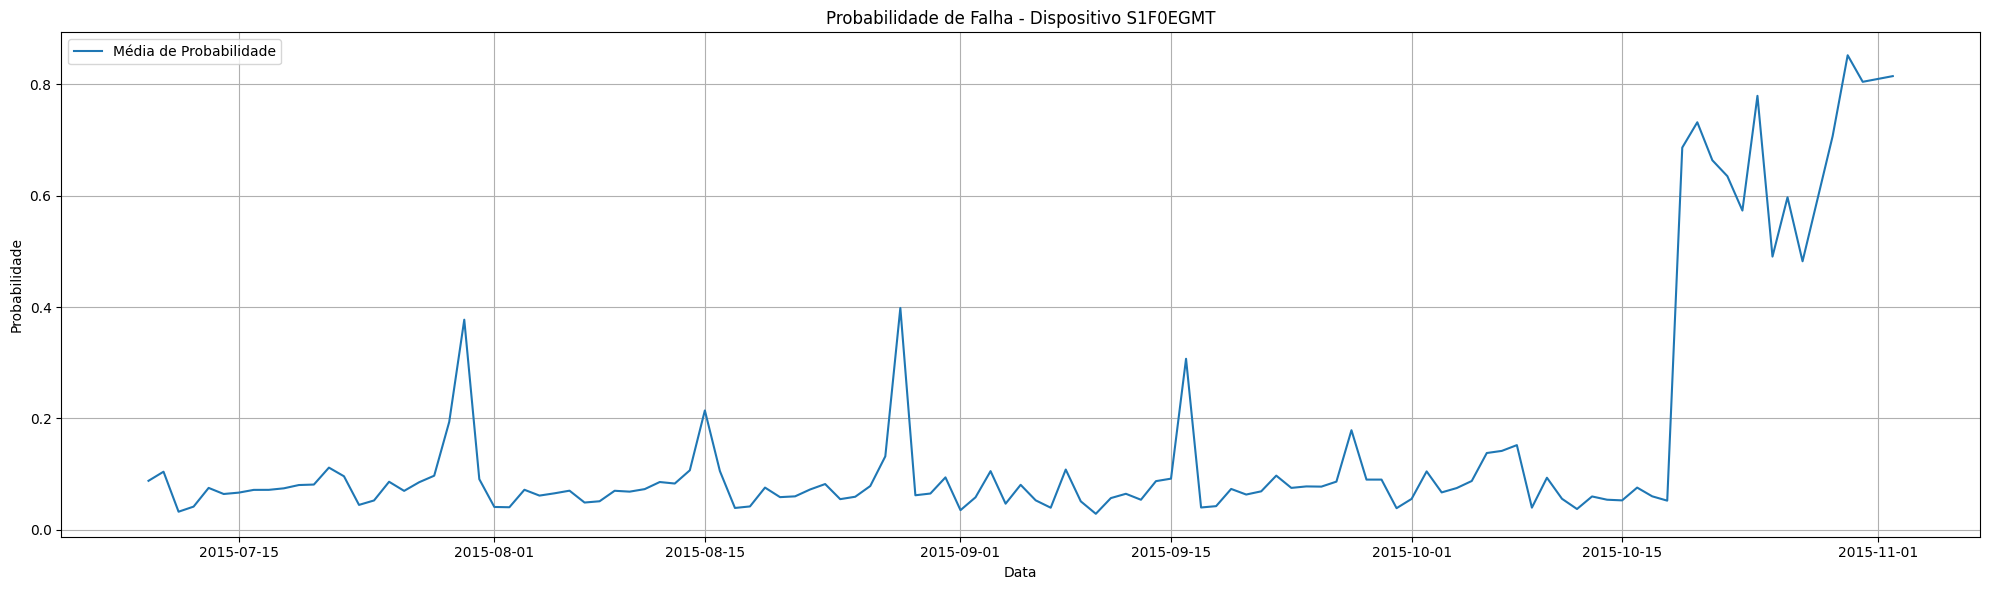

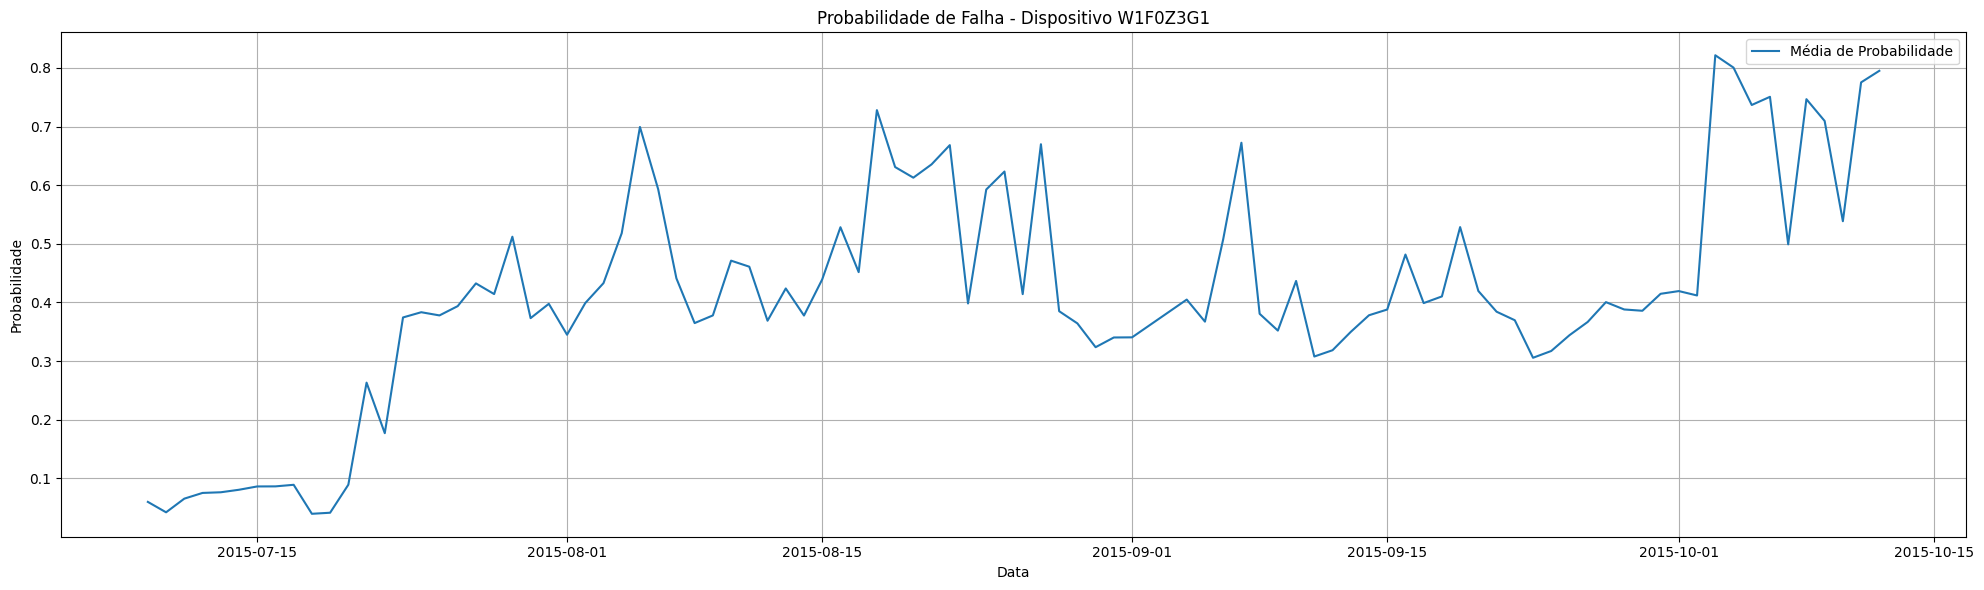

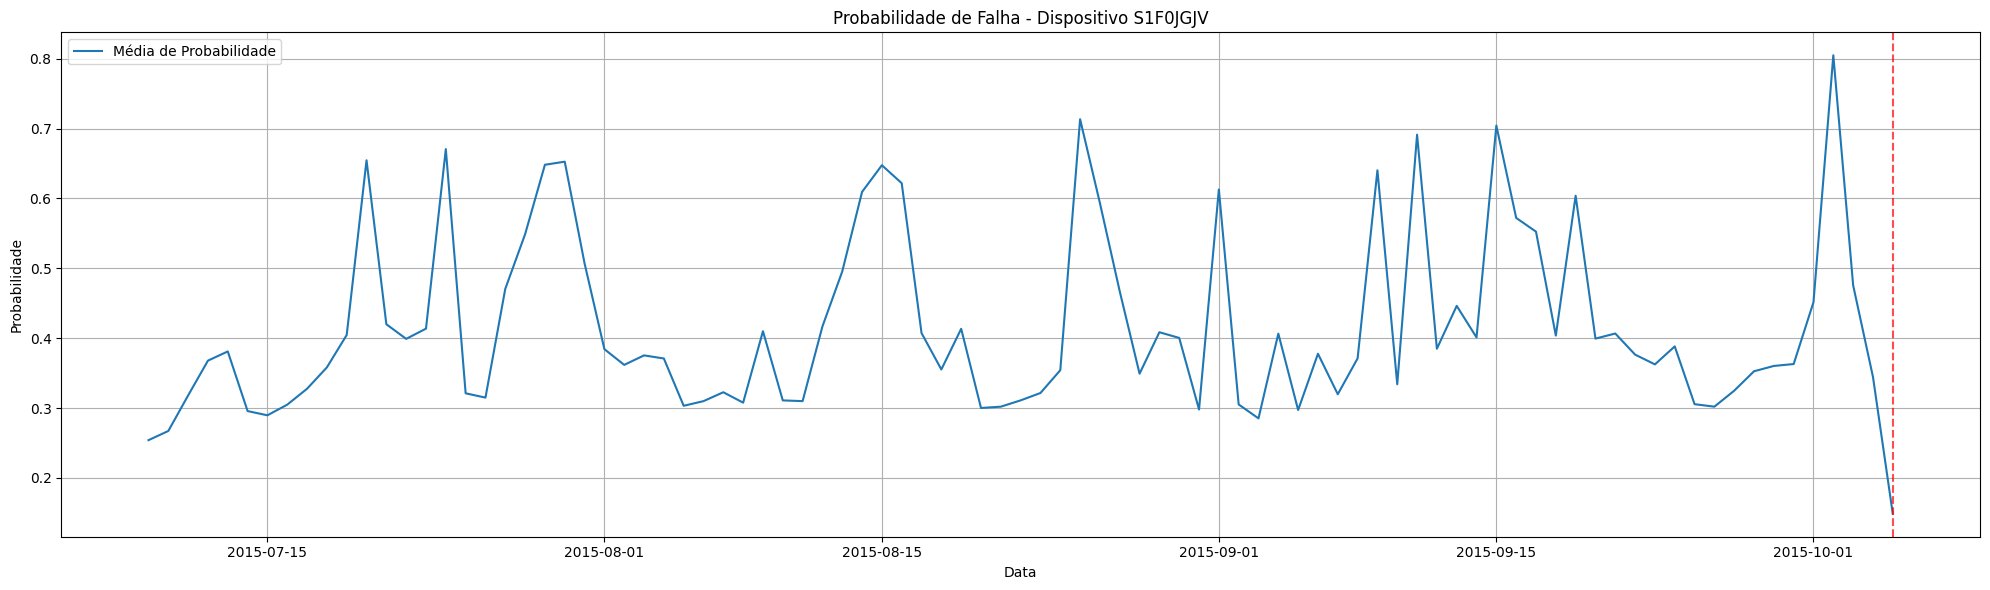

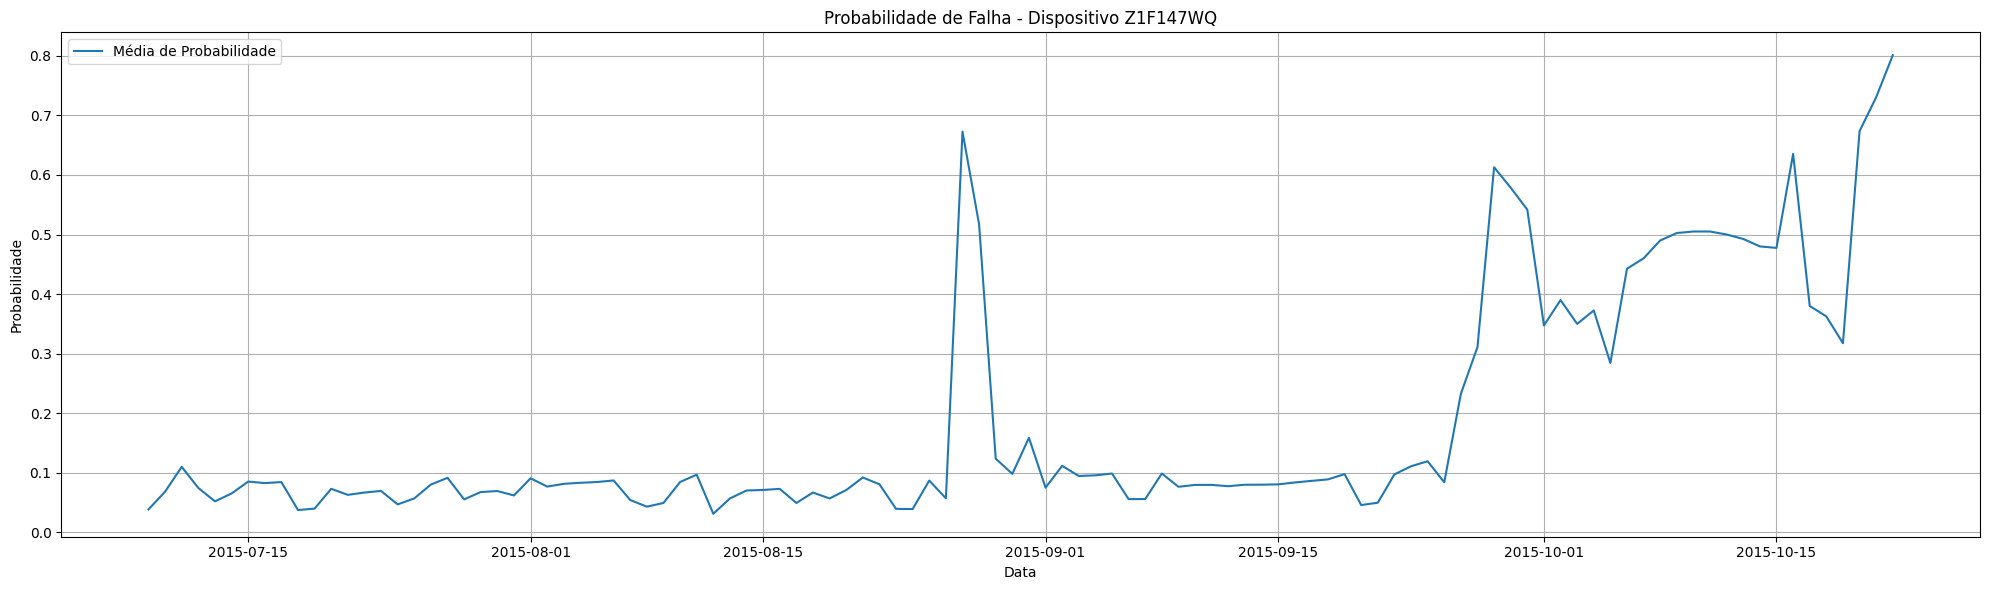

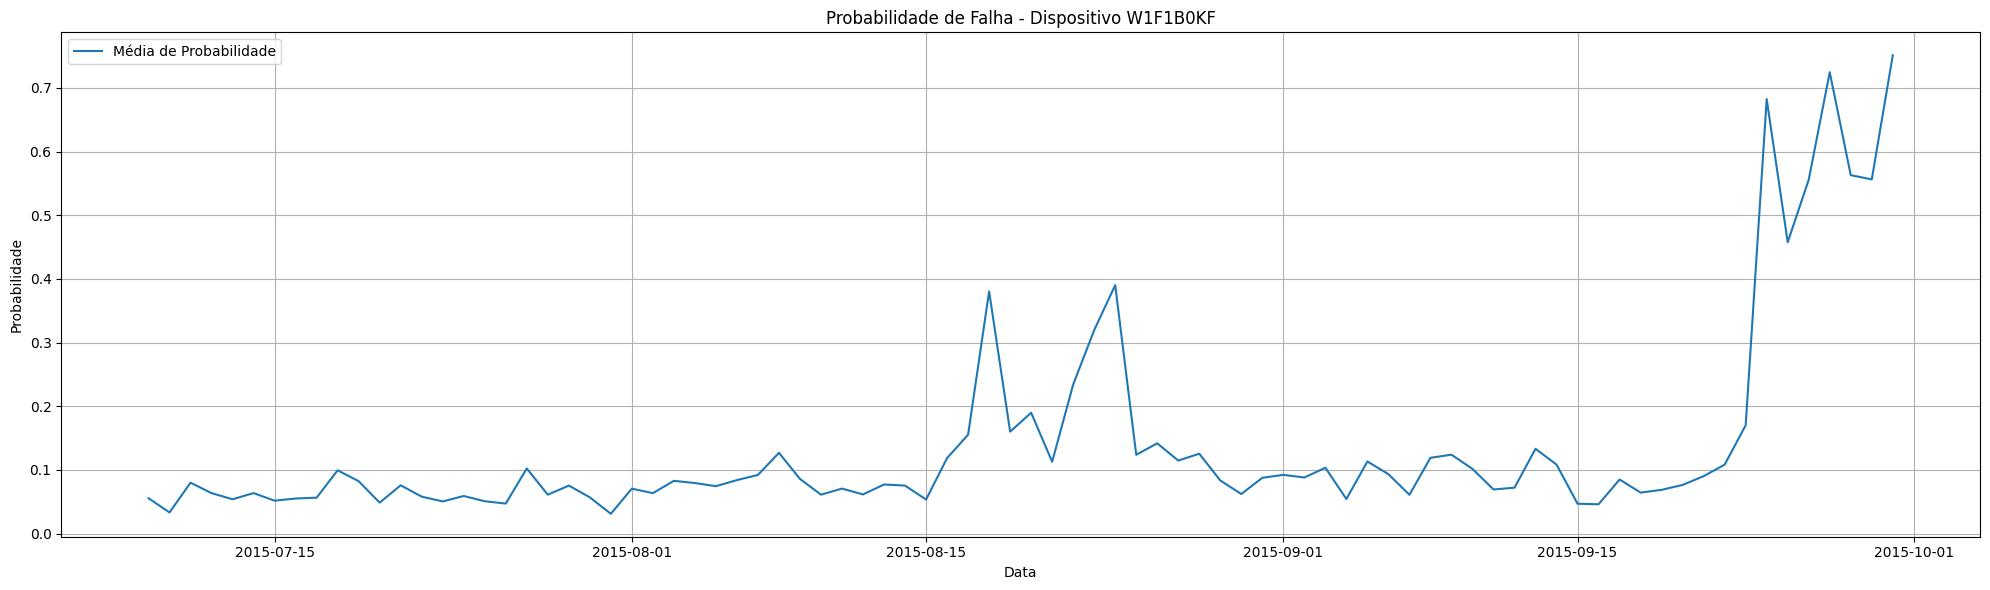

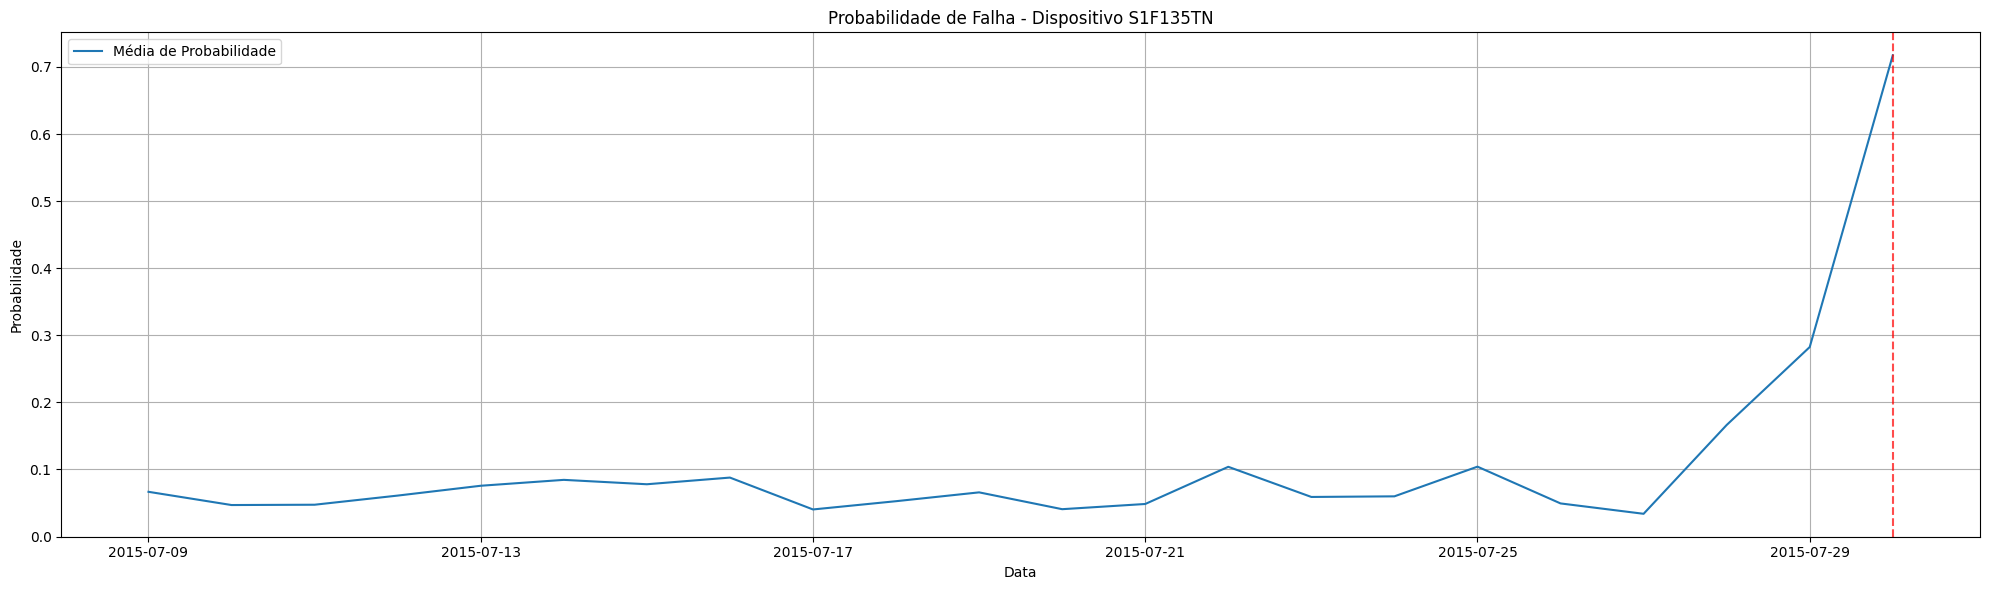

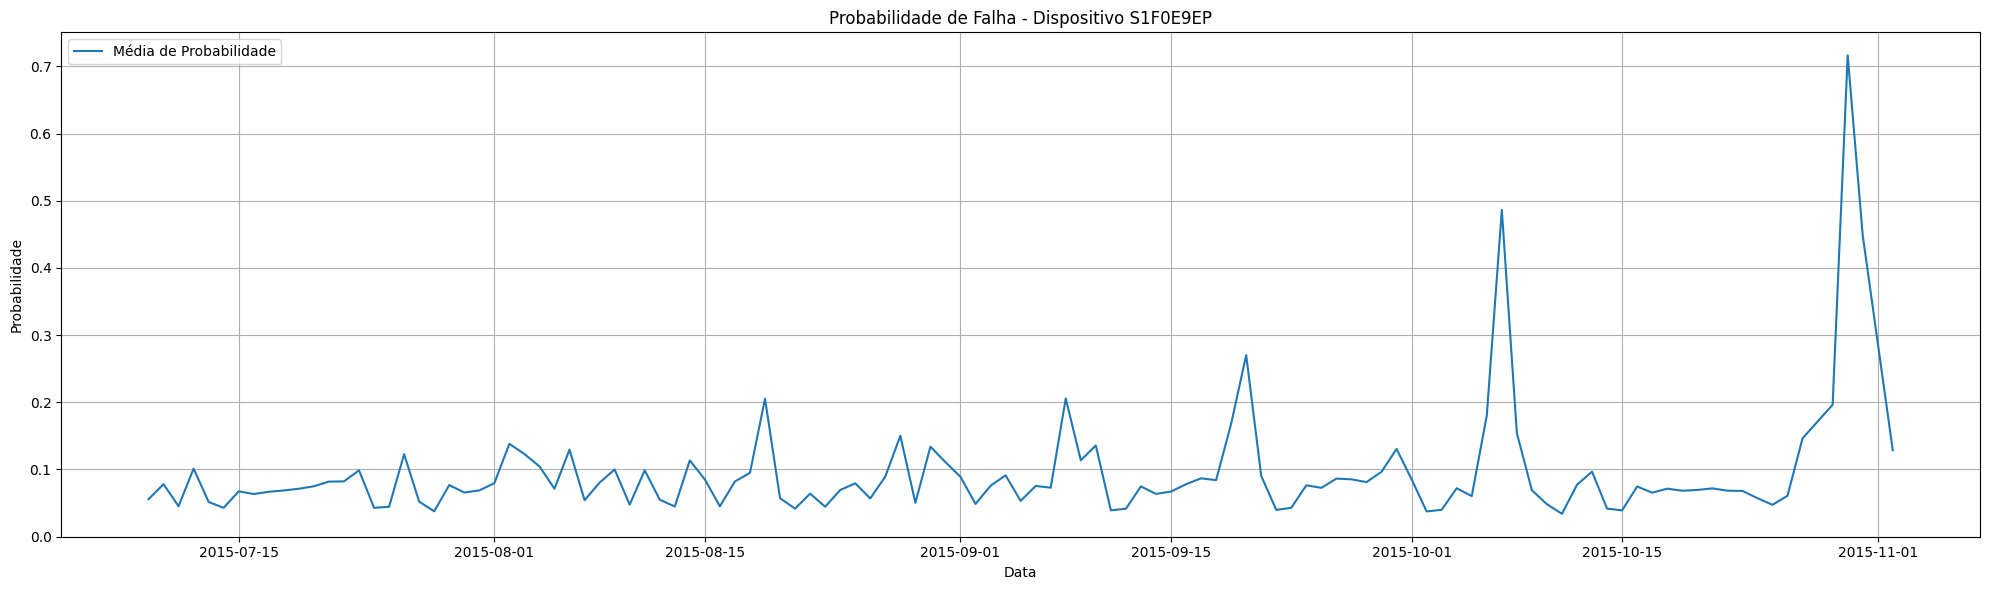

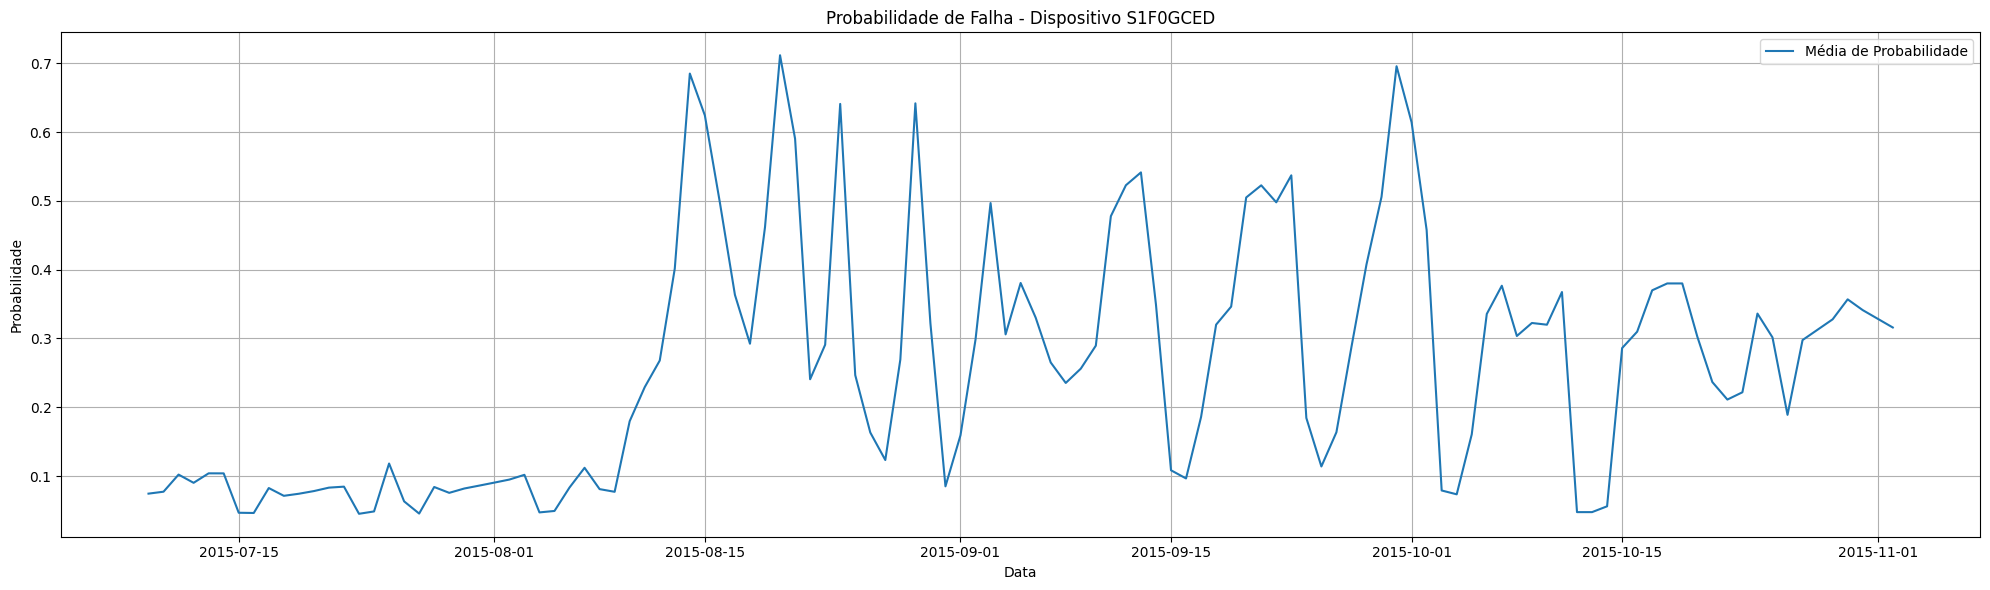

In [8]:
plot_probabilidades_com_falha(probability_report, top_high_risk_devices)

# Pipeline com otimização de hiperparâmetros

Distribuição original das classes:
failure
0    0.999149
1    0.000851
Name: proportion, dtype: float64

Train size: 99906 (Positive: 83)
Test size: 24587 (Positive: 23)

Antes do SMOTE - distribuição das classes no treino: Counter({0: 96318, 1: 83})
Após SMOTE - distribuição das classes no treino: Counter({0: 96318, 1: 96318})

Otimizando hiperparâmetros para RandomForest...
Melhores parâmetros para RandomForest: {'max_depth': None, 'n_estimators': 174}

Otimizando hiperparâmetros para LogisticRegression...
Melhores parâmetros para LogisticRegression: {'C': np.float64(9.51714306409916)}

Otimizando hiperparâmetros para XGBoost...
Melhores parâmetros para XGBoost: {'learning_rate': np.float64(0.16742692948967136), 'max_depth': 6, 'n_estimators': 188}

Model: RandomForest

AUC-ROC: 0.7746329697175858

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23518
           1       0.01      0.05      0.02        22



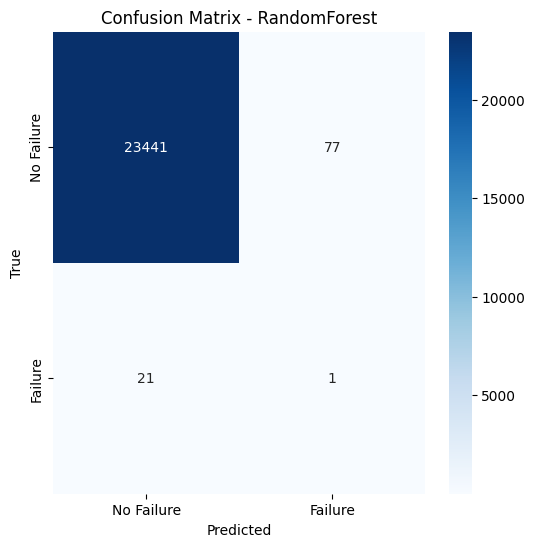


Model: LogisticRegression

AUC-ROC: 0.7331830938004933

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     23518
           1       0.01      0.41      0.02        22

    accuracy                           0.96     23540
   macro avg       0.50      0.68      0.50     23540
weighted avg       1.00      0.96      0.98     23540



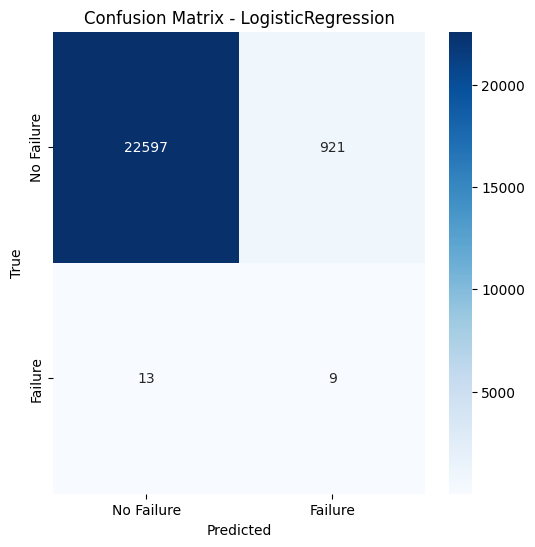


Model: XGBoost

AUC-ROC: 0.707145010784776

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     23518
           1       0.02      0.18      0.03        22

    accuracy                           0.99     23540
   macro avg       0.51      0.59      0.51     23540
weighted avg       1.00      0.99      0.99     23540



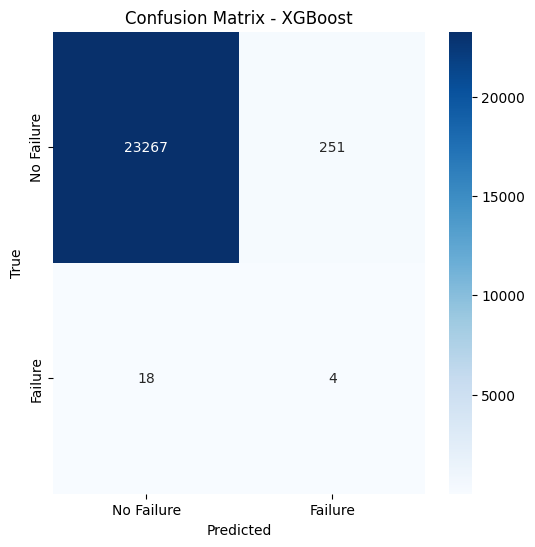


Relatório Final de Probabilidades por Dispositivo:
          device       date  prob_RandomForest  pred_RandomForest  \
100944  S1F01R2B 2015-07-09           0.000000                  0   
101289  S1F01R2B 2015-07-10           0.000000                  0   
101632  S1F01R2B 2015-07-11           0.000000                  0   
101975  S1F01R2B 2015-07-12           0.000000                  0   
102317  S1F01R2B 2015-07-13           0.011494                  0   
102658  S1F01R2B 2015-07-14           0.011494                  0   
102998  S1F01R2B 2015-07-15           0.022989                  0   
103337  S1F01R2B 2015-07-16           0.005747                  0   
103676  S1F01R2B 2015-07-17           0.017241                  0   
104015  S1F01R2B 2015-07-18           0.017241                  0   
104354  S1F01R2B 2015-07-19           0.000000                  0   
104692  S1F01R2B 2015-07-20           0.005747                  0   
105030  S1F01R2B 2015-07-21           0.005747     

In [144]:
# Pipeline com otimização de hiperparâmetros

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import randint,uniform

class DeviceFailureProbabilityPipeline:
    def __init__(self, file_path):
        self.file_path = file_path
        self.scaler = StandardScaler()
        self.results = {}

    def load_data(self):
        self.df = pd.read_csv(self.file_path, encoding='latin1')
        self.df['date'] = pd.to_datetime(self.df['date'])
        self.df = self.df.sort_values(by=['device', 'date'])
        self.df = self.df.drop_duplicates()

        for col in [f'attribute{i}' for i in range(1, 10)]:
            self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
        self.df = self.df.dropna()

        print("Distribuição original das classes:")
        print(self.df['failure'].value_counts(normalize=True))

    def temporal_split(self):
        cut_date = self.df['date'].quantile(0.8)
        train_mask = self.df['date'] <= cut_date
        test_mask = self.df['date'] > cut_date
        self.train_df = self.df[train_mask].copy()
        self.test_df = self.df[test_mask].copy()

        print(f"\nTrain size: {len(self.train_df)} (Positive: {self.train_df['failure'].sum()})")
        print(f"Test size: {len(self.test_df)} (Positive: {self.test_df['failure'].sum()})")

    def feature_engineering(self, df):
        lag_features = [f'attribute{i}' for i in range(1, 10)]
        for lag in range(1, 4):
            for feature in lag_features:
                if feature in df.columns:
                    df[f'{feature}_lag{lag}'] = df.groupby('device')[feature].shift(lag)

        for col in [f'attribute{i}' for i in range(1, 10)]:
            if col in df.columns:
                df[f'{col}_roll_mean'] = df.groupby('device')[col].rolling(window=3).mean().reset_index(0, drop=True)
                df[f'{col}_roll_std'] = df.groupby('device')[col].rolling(window=3).std().reset_index(0, drop=True)

        return df.dropna()

    def prepare_data(self):
        self.train_df = self.feature_engineering(self.train_df)
        self.test_df = self.feature_engineering(self.test_df)

        self.test_devices = self.test_df[['device', 'date']].copy()

        self.X_train = self.train_df.drop(columns=['failure', 'date', 'device'])
        self.y_train = self.train_df['failure']

        self.X_test = self.test_df.drop(columns=['failure', 'date', 'device'])
        self.y_test = self.test_df['failure']

        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)

        print("\nAntes do SMOTE - distribuição das classes no treino:", Counter(self.y_train))
        smote = SMOTE(random_state=42)
        self.X_train_resampled, self.y_train_resampled = smote.fit_resample(self.X_train_scaled, self.y_train)
        print("Após SMOTE - distribuição das classes no treino:", Counter(self.y_train_resampled))

    def calculate_scale_pos_weight(self):
        neg = len(self.y_train[self.y_train == 0])
        pos = len(self.y_train[self.y_train == 1])
        return neg / pos if pos > 0 else 1

    def optimize_model(self, model, param_distributions, name):
        print(f"\nOtimizando hiperparâmetros para {name}...")
        search = RandomizedSearchCV(
                model,
                param_distributions=param_distributions,
                n_iter=10,
                scoring='roc_auc',
                cv=3,
                n_jobs=-1,
                random_state=42
        )
        search.fit(self.X_train_resampled, self.y_train_resampled)
        print(f"Melhores parâmetros para {name}: {search.best_params_}")
        return search.best_estimator_


    def train_models(self):
        self.models = {
          'RandomForest': self.optimize_model(
            RandomForestClassifier(random_state=42, class_weight='balanced'),
            param_distributions={
                'n_estimators': randint(100, 200),
                'max_depth': [5, 10, None]
            },
            name='RandomForest'
        ),
          'BalancedRandomForest': self.optimize_model(
            BalancedRandomForestClassifier(
            random_state=42,
            sampling_strategy='auto',  # Equivalente ao class_weight='balanced'
            replacement=True  # amostragem com reposição
          ),
            param_distributions={
              'n_estimators': randint(100, 200),
              'max_depth': [5, 10, None],
              'max_features': ['sqrt', 'log2', None],
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 5)
            },
            name='BalancedRandomForest'
        ),

          'LogisticRegression': self.optimize_model(
            LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
            param_distributions={
                'C': uniform(0.01, 10)
            },
            name='LogisticRegression'
        ),
          'XGBoost': self.optimize_model(
            XGBClassifier(
                random_state=42,
                use_label_encoder=False,
                eval_metric='logloss',
                scale_pos_weight=self.calculate_scale_pos_weight()
            ),
            param_distributions={
                'n_estimators': randint(100, 200),
                'max_depth': [3, 6],
                'learning_rate': uniform(0.01, 0.3)
            },
            name='XGBoost'
        )
    }

    def evaluate_models(self):
        self.probability_results = self.test_devices.copy()
        for name, model in self.models.items():
            print(f"\n{'='*50}\nModel: {name}\n{'='*50}")
            y_pred = model.predict(self.X_test_scaled)
            y_proba = model.predict_proba(self.X_test_scaled)[:, 1]
            self.probability_results[f'prob_{name}'] = y_proba
            self.probability_results[f'pred_{name}'] = y_pred
            print("\nAUC-ROC:", roc_auc_score(self.y_test, y_proba))
            print("\nClassification Report:\n", classification_report(self.y_test, y_pred))
            cm = confusion_matrix(self.y_test, y_pred)
            plt.figure(figsize=(6, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=['No Failure', 'Failure'],
                        yticklabels=['No Failure', 'Failure'])
            plt.title(f'Confusion Matrix - {name}')
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()

    def generate_final_report(self):
        self.probability_results['true_failure'] = self.y_test.values
        self.probability_results = self.probability_results.sort_values(by=['device', 'date'])
        prob_columns = [f'prob_{name}' for name in self.models.keys()]
        self.probability_results['prob_avg'] = self.probability_results[prob_columns].mean(axis=1)
        return self.probability_results

    def run_pipeline(self):
        self.load_data()
        self.temporal_split()
        self.prepare_data()
        self.train_models()
        self.evaluate_models()
        return self.generate_final_report()

# Execução
pipeline = DeviceFailureProbabilityPipeline("/content/drive/MyDrive/PSEL e Hackatons/Mercado Livre/full_devices.csv")
report = pipeline.run_pipeline()
print("\nRelatório Final de Probabilidades por Dispositivo:")
print(report.head(20))


# Próximos passos:


*   Teste de um número maior de modelos
*   Seleção de features com RFE
*   Criação de alertas para variabilidades atípicas para dispositivos com séries de probabilidades atípicas

